# Dependencies

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

In [ ]:
#Loading the file
preds = pd.read_csv('got.csv')
preds.head(5)

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


# Exploratory Analysis

In [ ]:
preds.info

<bound method DataFrame.info of       S.No   plod                  name  ... isPopular  popularity isAlive
0        1  0.946  Viserys II Targaryen  ...         1    0.605351       0
1        2  0.613           Walder Frey  ...         1    0.896321       1
2        3  0.507          Addison Hill  ...         0    0.267559       1
3        4  0.924           Aemma Arryn  ...         0    0.183946       0
4        5  0.383        Sylva Santagar  ...         0    0.043478       1
...    ...    ...                   ...  ...       ...         ...     ...
1941  1942  0.197                 Luwin  ...         1    0.351171       0
1942  1943  0.013                  Reek  ...         0    0.096990       0
1943  1944  0.480      Symeon Star-Eyes  ...         0    0.030100       1
1944  1945  0.363             Coldhands  ...         0    0.130435       1
1945  1946  0.907       Tytos Lannister  ...         0    0.210702       0

[1946 rows x 30 columns]>

In [ ]:
#Number of dead vs. alive characters
equiv = {1:"Alive", 0:"Dead"}
preds["isAlive_str"] = preds["isAlive"].map(equiv)
fig = px.pie(preds, names="isAlive_str", title="Dead vs. Alive Characters")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
#Characters that do not appear in any books
preds['total_books_in'] = (preds['book1'] + 
                   preds['book2'] +
                   preds['book3'] +
                   preds['book4']+
                   preds['book5'])

In [ ]:
#Number books characters appear in
fig = px.pie(preds, names="total_books_in", title="Number books characters appear in")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [ ]:
showonly_str = {0:"Yes", 1:"No", 2:"No", 3:"No", 4:"No", 5:"No", 6:"No"}
showonly_num = {0:1, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
preds["showOnly"] = preds["total_books_in"].map(showonly_num)
preds["showOnly_str"] = preds["total_books_in"].map(showonly_str)
preds["showOnlyDead"]=np.where(np.logical_or(preds['showOnly']==1,preds['isAlive']==0),1,0)
preds.head(5)

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,isAlive_str,total_books_in,showOnly,showOnly_str,showOnlyDead
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0,Dead,0,1,Yes,1
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1,Alive,5,0,No,0
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1,Alive,1,0,No,0
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0,Dead,0,1,Yes,1
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1,Alive,1,0,No,0


In [ ]:
preds['showOnly'].value_counts()

0    1674
1     272
Name: showOnly, dtype: int64

In [ ]:
fig = px.pie(preds, values='showOnly', names='isAlive_str', title="Percentage of Show Only Characters Alive")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [ ]:
fig = px.pie(preds, names='isAlive_str', title="Percentage of All Characters Alive")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [ ]:
#Exploring age 
preds['age'].value_counts()
fig = px.scatter(preds, x="age", title="Ages of All Characters")
fig.show()

In [ ]:
#Exploring DOB
preds['dateOfBirth'].value_counts()
fig = px.scatter(preds, x="dateOfBirth", title="Dates of Birth of Characters")
fig.show()

In [ ]:
#Fixing the outlier age and date of births manually 
preds['age'].values[preds['age'] == -298001] = 0
preds['age'].values[preds['age'] == -277980] = 20
preds['dateOfBirth'].values[preds['dateOfBirth'] == 298299] = 298
preds['dateOfBirth'].values[preds['dateOfBirth'] == 278279] = 278

In [ ]:
#Exploring age
preds['age'].value_counts()
fig = px.scatter(preds, x="age", title="Cleaned Ages of All Characters")
fig.show()

In [ ]:
#Exploring DOB
preds['dateOfBirth'].value_counts()
fig = px.scatter(preds, x="dateOfBirth", title="Dates of Birth of Characters")
fig.show()

In [ ]:
#Does popularity cause death?
preds_dead = preds[preds.isAlive == 0]
fig = px.histogram(preds_dead, x="popularity", title="Popularity of Dead Characters")
fig.show()

In [ ]:
#Popularity of alive characters
preds_alive = preds[preds.isAlive == 1]
fig = px.histogram(preds_alive, x="popularity", title="Popularity of Alive Characters")
fig.show()

In [ ]:
#Popularity of show only characters
preds_so = preds[preds.showOnly == 1]
fig = px.histogram(preds_so, x="popularity", title="Popularity of Alive Characters")
fig.show()

In [ ]:
#Does gender affect death?
fig = px.histogram(preds, x="isAlive", color="male", title="Gender of Alive and Dead Characters")
#fig = px.histogram(preds, x="isAlive", color="male", title="Gender of Alive and Dead Characters", barnorm='percent')
fig.show()

In [ ]:
#Gender Distribution
male_str = {0:"Female", 1:"Male"}
preds["male_str"] = preds["male"].map(male_str)
fig = px.pie(preds, names="male_str", title="Gender of All Characters")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [ ]:
#Gender Distribution
preds_dead = preds[preds.isAlive == 0]
fig = px.pie(preds_dead, names="male_str", title="Gender of Dead Characters")
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [ ]:
#Does number of dead relations affect death?
fig = px.histogram(preds, x="numDeadRelations", color="isAlive", title="Number Dead Relations Alive and Dead Characters")
fig.show()

In [ ]:
#Does nobility affect death?
fig = px.histogram(preds, x="isAlive_str", color="isNoble", title="Nobility of Alive and Dead Characters")
fig.show()

In [ ]:
#Imputing median for Date of Birth and Age
dob_median = preds['dateOfBirth'].median()
preds['dateOfBirth'] = preds['dateOfBirth'].fillna(dob_median).round(3)
age_median = preds['age'].median()
preds['age'] = preds['age'].fillna(age_median).round(3)

In [ ]:
#Calculating house danger
preds['houseSize'] = preds['house'].map(preds['house'].value_counts())
preds['houseAlive'] = preds_alive['house'].map(preds_alive['house'].value_counts())
preds['houseDead'] = preds_dead['house'].map(preds_dead['house'].value_counts())
preds['houseDeathRate'] = preds['houseDead']/preds['houseSize'] 

In [ ]:
#Imputing other numerical variables with -1 (to indicate being missing)
num_fill = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'houseSize', 'houseAlive', 'houseDead', 'houseDeathRate']

for col in preds[num_fill]:
    if preds[col].isnull().astype(int).sum() > 0:
        preds[col] = preds[col].fillna(-1)

In [ ]:
#Imputing categorical missing values with unknown
cat_fill =['title', 'culture','mother','father', 'heir', 'house', 'spouse']

for col in preds[cat_fill]:
    if preds[col].isnull().astype(int).sum() > 0:
        preds[col] = preds[col].fillna('unknown')

In [ ]:
#Are some houses more dangerous?
fig = px.histogram(preds, x="isAlive_str", color="house", title="Houses of Alive and Dead Characters")
fig.show()

In [ ]:
#Plotting house death rates
fig = px.histogram(preds, x="house", y="houseDeathRate", title="Nobility of Alive and Dead Characters")
fig.show()

In [ ]:
#Checking for missing values
preds.isnull().sum()

S.No                    0
plod                    0
name                    0
title                   0
male                    0
culture                 0
dateOfBirth             0
DateoFdeath          1502
mother                  0
father                  0
heir                    0
house                   0
spouse                  0
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother           0
isAliveFather           0
isAliveHeir             0
isAliveSpouse           0
isMarried               0
isNoble                 0
age                     0
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
isAlive_str             0
total_books_in          0
showOnly                0
showOnly_str            0
showOnlyDead            0
houseSize               0
houseAlive              0
houseDead               0
houseDeathRa

# Models

In [ ]:
abs(preds.corr()['isAlive']) > 0.15

S.No                 False
plod                  True
male                 False
dateOfBirth           True
DateoFdeath          False
book1                False
book2                False
book3                False
book4                 True
book5                False
isAliveMother        False
isAliveFather        False
isAliveHeir          False
isAliveSpouse        False
isMarried            False
isNoble              False
age                   True
numDeadRelations      True
boolDeadRelations     True
isPopular             True
popularity            True
isAlive               True
total_books_in       False
showOnly              True
showOnlyDead          True
houseSize            False
houseAlive            True
houseDead             True
houseDeathRate        True
Name: isAlive, dtype: bool

In [ ]:
preds.corr().round(3)

,S.No,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,total_books_in,showOnly,showOnlyDead,houseSize,houseAlive,houseDead,houseDeathRate
S.No,1.000,0.181,0.117,-0.009,0.092,0.290,0.312,0.369,0.285,0.406,-0.083,-0.087,-0.111,0.149,0.151,0.242,0.087,0.093,0.171,0.170,0.278,-0.129,0.510,-0.166,0.016,0.036,0.011,0.032,0.162
plod,0.181,1.000,0.199,-0.307,0.105,0.241,0.143,0.026,-0.404,0.059,0.180,0.168,0.169,0.140,0.162,0.102,0.193,0.277,0.292,0.281,0.355,-0.417,0.006,0.266,0.408,0.082,-0.109,0.283,0.378
male,0.117,0.199,1.000,-0.010,-0.000,0.085,0.060,0.023,-0.063,0.062,0.068,0.079,0.082,-0.055,-0.082,0.156,0.031,0.042,0.053,0.129,0.141,-0.147,0.048,0.048,0.144,0.026,-0.046,0.051,0.124
dateOfBirth,-0.009,-0.307,-0.010,1.000,0.033,0.034,0.127,0.141,0.188,0.078,0.016,0.018,0.017,-0.176,-0.219,-0.187,-0.572,-0.103,-0.112,-0.044,-0.102,0.333,0.178,-0.296,-0.280,-0.041,0.154,-0.374,-0.376
DateoFdeath,0.092,0.105,-0.000,0.033,1.000,0.136,-0.043,-0.053,-0.078,-0.028,NaN,NaN,NaN,0.030,0.019,-0.098,-0.006,0.046,0.033,0.053,0.031,NaN,-0.022,-0.045,NaN,-0.076,NaN,-0.073,-0.124
book1,0.290,0.241,0.085,0.034,0.136,1.000,0.392,0.244,0.080,0.265,-0.050,-0.046,-0.052,0.092,0.086,0.096,0.044,0.192,0.242,0.252,0.325,-0.147,0.568,-0.201,0.054,0.157,0.050,0.116,0.146
book2,0.312,0.143,0.060,0.127,-0.043,0.392,1.000,0.450,0.176,0.226,-0.078,-0.078,-0.081,0.158,0.157,0.023,-0.014,0.075,0.124,0.139,0.248,-0.067,0.686,-0.312,-0.065,0.246,0.239,0.028,0.079
book3,0.369,0.026,0.023,0.141,-0.053,0.244,0.450,1.000,0.374,0.285,-0.097,-0.106,-0.101,0.153,0.152,0.025,-0.037,0.053,0.119,0.112,0.214,0.007,0.734,-0.388,-0.165,0.194,0.175,0.050,0.032
book4,0.285,-0.404,-0.063,0.188,-0.078,0.080,0.176,0.374,1.000,0.337,-0.122,-0.133,-0.127,0.138,0.128,0.080,-0.064,-0.008,0.036,0.035,0.116,0.269,0.620,-0.486,-0.447,0.013,0.138,-0.154,-0.203
book5,0.406,0.059,0.062,0.078,-0.028,0.265,0.226,0.285,0.337,1.000,-0.082,-0.089,-0.085,0.107,0.096,0.102,0.034,0.104,0.171,0.127,0.216,0.033,0.653,-0.326,-0.164,0.072,0.045,-0.004,-0.033


In [ ]:
preds_partial = preds[['S.No',
                      'male',
                      'dateOfBirth',
                      'book1',
                      'book4',
                      'numDeadRelations',
                      'boolDeadRelations',
                      'popularity',
                      'showOnly',
                      'houseDeathRate']]

preds_target = preds.loc[: ,'isAlive']

## Logistic Regression, sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(preds_partial,
                                                    preds_target,
                                                    test_size = 0.2,
                                                    random_state = 508)

#Instantiate and fit
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

#Predict
lr_pred = lr_fit.predict(X_test)
y_score_ols = lr_fit.score(X_test, y_test)

print('Model Score', y_score_ols) 
print('Training Score', lr_fit.score(X_train, y_train).round(7))
print('Testing Score:', lr_fit.score(X_test, y_test).round(7))

Model Score 0.9615384615384616
Training Score 0.9524422
Testing Score: 0.9615385


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(
            preds_partial,
            preds_target,
            test_size = 0.2,
            random_state = 508,
            stratify = preds_target)

#Instantiate and fit
c_tree = DecisionTreeClassifier(random_state = 508)
c_tree_fit = c_tree.fit(X_train, y_train)

#Printing model scores
print('Training Score', c_tree_fit.score(X_train, y_train).round(7))
print('Testing Score:', c_tree_fit.score(X_test, y_test).round(7))

Training Score 1.0
Testing Score: 0.9282051


## KNN Models

### Unscaled KNN

Highest test accuracy was at 7 neighbors. 
Training Score 0.8567
Testing Score: 0.7385
AUC Score: 0.44132873055797955


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



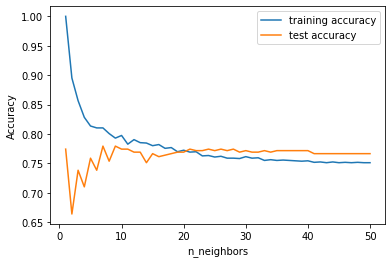

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(
            preds_partial,
            preds_target,
            test_size = 0.2,
            random_state = 508)

training_accuracy = []
test_accuracy = []

#Instantiate and fit
neighbors_settings = range(1, 51)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

#Plot training and test accuracies
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#Find optimal number neighbors via test accuracy
optimal_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print('Highest test accuracy was at {} neighbors. '.format(optimal_neighbors))

#Instantiate and fit
knn_reg = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3)
knn_reg_fit = knn_reg.fit(X_train, y_train)
y_score_knn_train = knn_reg.score(X_train, y_train)
y_score_knn_optimal = knn_reg.score(X_test, y_test)

#Printing model scores
cv = cross_val_score(knn_reg, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', y_score_knn_train.round(4))
print('Testing Score:', y_score_knn_optimal.round(4))
print('AUC Score:', pd.np.mean(cv))

### Scaled KNN

7
Training Score 0.9659
Testing Score: 0.9692
AUC Score: 0.45337345012156366


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



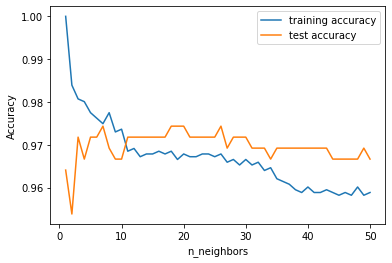

In [ ]:
from sklearn.preprocessing import StandardScaler

#Instantiate scaler and add labels
scaler = StandardScaler()
scaler.fit(preds_partial)
preds_scaled = scaler.transform(preds_partial)
preds_scaled_table = pd.DataFrame(preds_scaled)
preds_scaled_table.columns = preds_partial.columns

#Train, test, split with scaled data
X_train, X_test, y_train, y_test = train_test_split(
            preds_scaled_table,
            preds_target,
            test_size = 0.2,
            random_state = 508)

training_accuracy = []
test_accuracy = []

#Instantiate and fit
neighbors_settings = range(1, 51)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#Find optimal number neighbors via test accuracy
print(test_accuracy.index(max(test_accuracy)) + 1)
knn_reg = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = 27)

#Instantiate and fit
knn_reg_fit = knn_reg.fit(X_train, y_train)
y_score_knn_train = knn_reg.score(X_train, y_train)
y_score_knn_optimal = knn_reg.score(X_test, y_test)


#Printing model scores
cv = cross_val_score(knn_reg,preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', y_score_knn_train.round(4))
print('Testing Score:', y_score_knn_optimal.round(4))
print('AUC Score:', pd.np.mean(cv))

## GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(
            preds_partial,
            preds_target.values.ravel(),
            test_size = 0.1,
            random_state = 508,
            stratify = preds_target)

#Instantiate and fit
gbm = GradientBoostingClassifier(loss = 'deviance',
                                  learning_rate = 1.5,
                                  n_estimators = 100,
                                  max_depth = 3,
                                  criterion = 'friedman_mse',
                                  warm_start = False,
                                  random_state = 508,
                                  )
gbm_basic_fit = gbm.fit(X_train, y_train)
gbm_basic_predict = gbm_basic_fit.predict(X_test)

#Printing model scores
cv = cross_val_score(gbm, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', gbm_basic_fit.score(X_train, y_train).round(4))
print('Testing Score:', gbm_basic_fit.score(X_test, y_test).round(4))
print('AUC Score:', pd.np.mean(cv))

Training Score 0.98
Testing Score: 0.9641
AUC Score: 0.9234844207176223


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Random Forest Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(
            preds_partial,
            preds_target.values.ravel(),
            test_size = 0.2,
            random_state = 508,
            stratify = preds_target)

In [ ]:
#Instantiate and fit Gini
RF_gini = RandomForestClassifier(n_estimators = 100,
                                     criterion = 'gini',
                                     max_depth = None,
                                     min_samples_leaf = 1,
                                     bootstrap = False,
                                     warm_start = False,
                                     random_state = 508)

#Fitting model
RF_gini_fit = RF_gini.fit(X_train, y_train)

#Printing model scores
print('Training Score', RF_gini_fit.score(X_train, y_train).round(7))
print('Testing Score:', RF_gini_fit.score(X_test, y_test).round(7))

Training Score 1.0
Testing Score: 0.9512821


In [ ]:
#Instantiate and fit Entropy
RF_entropy = RandomForestClassifier(n_estimators = 100,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     min_samples_leaf = 1,
                                     bootstrap = False,
                                     warm_start = False,
                                     random_state = 508)
RF_entropy_fit = RF_entropy.fit(X_train, y_train)

#Printing model scores
print('Training Score', RF_entropy_fit.score(X_train, y_train).round(7))
print('Testing Score:', RF_entropy_fit.score(X_test, y_test).round(7))

Training Score 1.0
Testing Score: 0.9435897


In [ ]:
#Comparing Gini and Entropy AUC scores
cv_gini = cross_val_score(RF_gini, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Gini AUC Score', pd.np.mean(cv_gini))

cv_entropy = cross_val_score(RF_entropy, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Entropy AUC Score', pd.np.mean(cv_entropy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Gini AUC Score 0.9469568509902682
Entropy AUC Score 0.9487720617706245


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Define search parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid = RandomForestClassifier(random_state = 508)

#Instantiate and fit
random_grid_cv = RandomizedSearchCV(random_grid, param_grid, cv = 3)
random_grid_cv.fit(X_train, y_train)

#Printing model scores
print("Optimal RF Parameters:", random_grid_cv.best_params_)
print("Optimal RF Accuracy:", random_grid_cv.best_score_.round(4))

Optimal RF Parameters: {'n_estimators': 600, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Optimal RF Accuracy: 0.9627


### Optimized Random Forest

In [ ]:
#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(
            preds_partial,
            preds_target.values.ravel(),
            test_size = 0.2,
            random_state = 508,
            stratify = preds_target)

In [ ]:
#Instantiate and fit optimized Gini
RF_gini = RandomForestClassifier(n_estimators = 1000,
                                     criterion = 'gini',
                                     max_depth = 50,
                                     min_samples_leaf = 4,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)

#Fitting model
RF_fit = RF_gini.fit(X_train, y_train)
RF_pred = RF_gini.predict(X_test)

#Scoring the gini model
cv_gini = cross_val_score(RF_gini, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', RF_gini_fit.score(X_train, y_train).round(7))
print('Testing Score:', RF_gini_fit.score(X_test, y_test).round(7))
print('Gini AUC Score', pd.np.mean(cv_gini))

Training Score 0.9601542
Testing Score: 0.9564103
Gini AUC Score 0.9350484941124538


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
#Instantiate and fit optimized Entropy
RF_entropy = RandomForestClassifier(n_estimators = 1000,
                                     criterion = 'entropy',
                                     max_depth = 50,
                                     min_samples_leaf = 4,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)

#Fitting model
RF_entropy_fit = RF_entropy.fit(X_train, y_train)
RF_entropy_pred = RF_entropy.predict(X_test)

#Printing model scores
cv_entropy = cross_val_score(RF_entropy, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', RF_entropy_fit.score(X_train, y_train).round(7))
print('Testing Score:', RF_entropy_fit.score(X_test, y_test).round(7))
print('Entropy AUC Score', pd.np.mean(cv_entropy))

Training Score 0.964653
Testing Score: 0.9564103
Entropy AUC Score 0.9363223546658689


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Feature Importance

In [ ]:
def plot_feature_importances(model, train = X_train):
    n_features = X_train.shape[1]
    fig = px.bar(X_train, model.feature_importances_, y=X_train.columns, orientation='h')
    fig.update_layout(xaxis=dict(title="Feature Importance"), yaxis=dict(title="Feature")) 
    fig.show()
        
plot_feature_importances(RF_entropy_fit, train = X_train)

## Final Model

In [ ]:
#Instantiate and fit optimized Gini
RF_final = RandomForestClassifier(n_estimators = 1000,
                                     criterion = 'gini',
                                     max_depth = 50,
                                     min_samples_leaf = 4,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)

#Fitting model
RF_final_fit = RF_final.fit(X_train, y_train)
RF_final_pred = RF_final.predict(X_test)

#Scoring the gini model
cv_final = cross_val_score(RF_final, preds_partial, preds_target, cv = 3, 
                          scoring =  'roc_auc')
print('Training Score', RF_final_fit.score(X_train, y_train).round(7))
print('Testing Score:', RF_final_fit.score(X_test, y_test).round(7))
print('Entropy AUC Score', pd.np.mean(cv_final))

Training Score 0.964653
Testing Score: 0.9564103
Entropy AUC Score 0.9373206078200688


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
#Compiling model results and sorting by popularity
compare_df = pd.DataFrame({'Actual' : y_test,
                                     'RF_Predicted': RF_gini_pred})
model_results = pd.merge(preds, compare_df, how = 'left', left_index = True, right_index = True)
model_results = model_results.dropna(subset = ['RF_Predicted'])
model_results = model_results.sort_values(by=['popularity'], ascending=False)
model_results

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,isAlive_str,total_books_in,showOnly,showOnly_str,showOnlyDead,houseSize,houseAlive,houseDead,houseDeathRate,Actual,RF_Predicted
101,102,0.964,Robb Stark,unknown,1,unknown,268.0,NaN,Catelyn Stark,Eddard Stark,Bran Stark,unknown,unknown,0,0,0,0,0,0.0,0.0,1.0,-1.0,0,0,27.0,7,1,1,1.0,0,Dead,0,1,Yes,1,-1.0,-1.0,-1.0,-1.0,1.0,1.0
54,55,0.648,Margaery Tyrell,Seven Kingdoms,0,Reach,283.0,NaN,unknown,unknown,unknown,House Tyrell,Renly Baratheon,1,1,1,1,1,-1.0,-1.0,-1.0,0.0,1,1,22.0,3,1,1,1.0,1,Alive,5,0,No,0,36.0,34.0,-1.0,-1.0,1.0,1.0
5,6,0.979,Tommen Baratheon,unknown,1,unknown,268.0,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,unknown,unknown,0,0,0,0,0,1.0,1.0,1.0,-1.0,0,0,27.0,5,1,1,1.0,1,Alive,0,1,Yes,1,-1.0,-1.0,-1.0,-1.0,0.0,0.0
50,51,0.603,Joffrey Baratheon,unknown,1,unknown,268.0,NaN,Cersei Lannister,Robert Baratheon,Tommen Baratheon,unknown,unknown,0,0,0,0,0,1.0,1.0,1.0,-1.0,0,0,27.0,5,1,1,1.0,0,Dead,0,1,Yes,1,-1.0,-1.0,-1.0,-1.0,0.0,0.0
280,281,0.890,Aegon I Targaryen,unknown,1,unknown,268.0,NaN,Valaena Velaryon,Aerion Targaryen,Aenys Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,1.0,-1.0,0,0,27.0,6,1,1,1.0,0,Dead,0,1,Yes,1,-1.0,-1.0,-1.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,0.216,Walder Frey (son of Jammos),unknown,1,unknown,291.0,NaN,unknown,unknown,unknown,House Frey,unknown,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,14.0,0,0,0,0.0,1,Alive,0,1,Yes,1,97.0,83.0,-1.0,-1.0,0.0,0.0
245,246,0.191,Walda Frey (daughter of Merrett),unknown,0,unknown,283.0,NaN,unknown,unknown,unknown,House Frey,Roose Bolton,0,0,0,0,0,-1.0,-1.0,-1.0,1.0,1,0,22.0,0,0,0,0.0,1,Alive,0,1,Yes,1,97.0,83.0,-1.0,-1.0,1.0,1.0
244,245,0.227,Walda Frey (daughter of Walton),unknown,0,unknown,280.0,NaN,unknown,unknown,unknown,House Frey,unknown,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,25.0,0,0,0,0.0,1,Alive,0,1,Yes,1,97.0,83.0,-1.0,-1.0,1.0,1.0
243,244,0.195,Walda Frey (daughter of Rhaegar),unknown,0,unknown,288.0,NaN,unknown,unknown,unknown,House Frey,unknown,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,17.0,0,0,0,0.0,1,Alive,0,1,Yes,1,97.0,83.0,-1.0,-1.0,1.0,1.0


In [ ]:
#Getting entries that were correctly predicted and sorting by popularity
correct_preds = model_results.loc[model_results['Actual'] == model_results['RF_Predicted']]
correct_preds = correct_preds.sort_values(by=['popularity'], ascending=False)
correct_preds = correct_preds[['name', 'Actual','RF_Predicted']]
correct_preds.head(10)

,name,Actual,RF_Predicted
101,Robb Stark,1.0,1.0
54,Margaery Tyrell,1.0,1.0
5,Tommen Baratheon,0.0,0.0
50,Joffrey Baratheon,0.0,0.0
296,Aerys II Targaryen,1.0,1.0
172,Stannis Baratheon,1.0,1.0
273,Samwell Tarly,0.0,0.0
1,Walder Frey,0.0,0.0
281,Aegon II Targaryen,1.0,1.0
53,Maegor I Targaryen,1.0,1.0


In [ ]:
#Getting entries that were incorrectly predicted and sorting by popularity
incorrect_preds = model_results.loc[model_results['Actual'] != model_results['RF_Predicted']]
incorrect_preds = incorrect_preds.sort_values(by=['popularity'], ascending=False)
incorrect_preds = incorrect_preds[['name', 'Actual','RF_Predicted']]
incorrect_preds.head(15)

,name,Actual,RF_Predicted
280,Aegon I Targaryen,0.0,1.0
346,Bella,0.0,1.0
179,Symond Botley,0.0,1.0
167,Squirrel,0.0,1.0
330,Baelon Targaryen (son of Aerys),0.0,1.0
27,Wulfe,0.0,1.0
39,Yorko Terys,0.0,1.0
113,Roland Crakehall (Kingsguard),0.0,1.0
36,Yna,0.0,1.0
335,Barre,0.0,1.0
